In [12]:
import numpy as np
import matplotlib.pyplot as plt


file = open("ldaData.txt","r")

col1=[]
col2=[]
label=[]
counter=0

for line in file:

    fields = line.split()
    counter=counter+1 # to assign initial classes to each point
    col1= np.append(col1,float(fields[0]))
    col2=np.append(col2,float(fields[1]))
    if counter<51:
        temp=1
    elif counter<94:
        temp=2
    else:
        temp=3
   
    
    label=np.append(label,temp)

file.close()

#display(col1)

In [13]:
Xh=np.vstack((col1,col2))
#display(Xh)

In [57]:
Xv=Xh.T
X=Xv

In [10]:
prior=[50/137,43/137,44/137]

In [11]:
def pdf_Calc(val,mu,sig,lam):
    den=(2*np.pi*(np.linalg.det(sig))**0.5)
    inv_sig=np.linalg.inv(sig)
    temp = np.array([val[0]-mu[0],val[1]-mu[1]])
    c = np.matmul(temp,inv_sig)
    d = np.dot(c,temp)
    P_x = lam*(np.exp(-0.5*d))/den
    return P_x

In [14]:
mean_vectors = []
for cls in range(1,4):
    mean_vectors.append(np.mean(X[label==cls], axis=0))
   
    #print('Mean Vector class %s: %s\n' %(cls, mean_vectors[cls-1]))
cov_vectors_all=np.cov(X[:,0],X[:,1])  #np.cov(points_cluster1[:,0],points_cluster1[:,1])
#print('Covariance Vector class %s\n' %(cov_vectors_all))



cov_vectors = []
for cls in range(1,4):
    mean_vectors.append(np.mean(X[label==cls], axis=0))
    #print('Mean Vector class %s: %s\n' %(cls, mean_vectors[cls-1]))
    cov_vectors.append(np.cov(X[label==cls,0],X[label==cls,1]))  #np.cov(points_cluster1[:,0],points_cluster1[:,1])
    #print('Covariance Vector class %s\n' %(cov_vectors))
sum=(cov_vectors[0]*50+cov_vectors[1]*43+cov_vectors[2]*44)/137
cov_vectors[0]=sum
cov_vectors[1]=sum
cov_vectors[2]=sum

In [44]:
new_labels = ([1] * 137)
for i in range(len(X)):
        x = X[i][0]
        y = X[i][1]
        prob_cluster1 = pdf_Calc([x, y], mean_vectors[0], cov_vectors[0], prior[0] )
        prob_cluster2 = pdf_Calc([x, y], mean_vectors[1], cov_vectors[1], prior[1] )
        prob_cluster3 = pdf_Calc([x, y], mean_vectors[2], cov_vectors[2], prior[2] )
        temp=[prob_cluster1,prob_cluster2,prob_cluster3]
        temp2=sorted(temp)

        #depending on which cluster gives highest probability density assign labels
        if temp2[2]==prob_cluster1:  
            new_labels[i] = 1
            
        if temp2[2]==prob_cluster2:
            new_labels[i] = 2
            
        if temp2[2]==prob_cluster3:
            new_labels[i] = 3
            

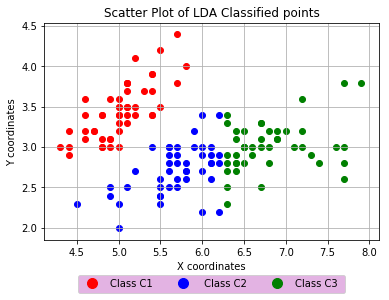

In [59]:
colors = ['red', 'blue', 'green']

for i in range(137):
         plt.scatter( x=X[i,0],y=X[i,1],c=colors[int(new_labels[i]-1)])

color = ["r", "b","g"]
texts = ["Class C1", " Class C2", "Class C3 "]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ] 
plt.legend(handles=patches, bbox_to_anchor=(.5, -0.2), 
           loc='center', ncol=3, facecolor="plum", numpoints=1 )

plt.title("Scatter Plot of LDA Classified points")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True, which='both')


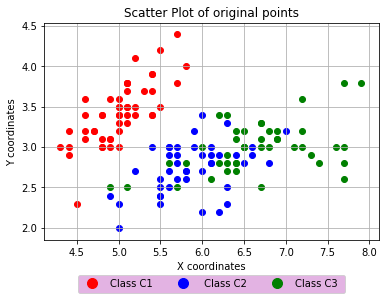

In [58]:
colors = ['red', 'blue', 'green']


for i in range(137):
         plt.scatter( x=X[i,0],y=X[i,1],c=colors[int(label[i]-1)])
        

color = ["r", "b","g"]
texts = ["Class C1", " Class C2", "Class C3 "]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ] 
plt.legend(handles=patches, bbox_to_anchor=(.5, -0.2), 
           loc='center', ncol=3, facecolor="plum", numpoints=1 )

plt.title("Scatter Plot of original points")
plt.xlabel("X coordinates")
plt.ylabel("Y coordinates")
plt.grid(True, which='both')


In [54]:
np.sum(label != new_labels)

19

In [11]:
## 19 samples are misclassified##